<h2>Load data</h2>

In [1]:
from numpy import loadtxt

# load data
import pandas as pd
# training data
df = pd.read_csv('data_mnist/mnist_train_scaled_avg.csv')
np_data = df.values
# split data into X and y
X = np_data[:,0:-1]
Y = np_data[:,-1]

# test data
df_test = pd.read_csv('data_mnist/mnist_test_scaled_avg.csv')
np_data_test = df_test.values
# split data into X and y
X_test = np_data_test[:,0:-1]
Y_test = np_data_test[:,-1]

# set seed to randomizer
seed = 7

<h2>Function for evaluating model accuracy</h2>

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def evaluate(model):
    print("-- Training data --")
    # train model on training dataset
    model.fit(X, Y)
    # evaluate dataset
    y_pred = model.predict(X)
    predictions = [round(value) for value in y_pred]
    # calculate accuracy
    accuracy = accuracy_score(Y, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # confusion matrix
    print("Confusion Matrix:")
    conf_mx = confusion_matrix(Y, y_pred)
    print(conf_mx)
    # Visualize (normalized) confusion matrix
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
    plt.show()
    
    print("")
    print("-- Test data --")
    # evaluate dataset
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # calculate accuracy
    accuracy = accuracy_score(Y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    # confusion matrix
    print("Confusion Matrix:")
    conf_mx = confusion_matrix(Y_test, y_pred)
    print(conf_mx)
    # Visualize (normalized) confusion matrix
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
    plt.show()

<h2>Linear classifier</h2>

-- Training data --
Accuracy: 85.55%
Confusion Matrix:
[[5785    3   23   19   21   20   21   10   21    0]
 [   2 6597   33   10   14   39    3    7   37    0]
 [  41   60 5370   87  109   49   43   75  120    4]
 [  25   66  272 5223   48  297   30   57   98   15]
 [  44   41   35    3 5613   16   24   18   14   34]
 [  68   40   52  162  142 4531   86   60  254   26]
 [  46   34   88    5   65  127 5531    7   15    0]
 [  32   80   99   30  119   22    3 5822    8   50]
 [  84  453  141  142  278  626   58   51 3989   29]
 [  95  101   44   79 1719  363    0  662   15 2871]]


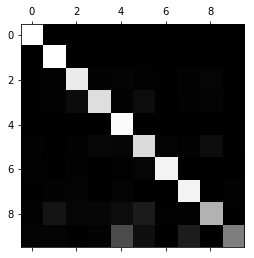


-- Test data --
Accuracy: 85.84%
Confusion Matrix:
[[ 966    0    1    4    0    3    2    1    3    0]
 [   0 1117    3    1    0    4    2    1    7    0]
 [   7   13  916   18   19    8    8   12   30    1]
 [   3    3   34  877    5   57    2   13   13    3]
 [   6    2    5    1  945    2    8    1    6    6]
 [  11    5    8   27   28  743   15   16   38    1]
 [  14    3   14    2   12   30  883    0    0    0]
 [   3   19   26   10   17    2    0  944    1    6]
 [  14   42   19   17   64   93   17   17  686    5]
 [  15   14    3   11  283   70    0  104    2  507]]


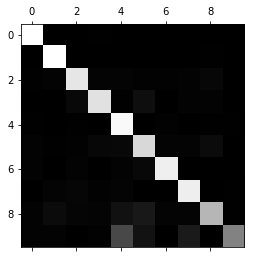

In [3]:
from sklearn import linear_model

# train model
model = linear_model.SGDClassifier(max_iter=80, random_state=seed)
evaluate(model)

<h2>Neural Network classifier</h2>

-- Training data --
Accuracy: 99.32%
Confusion Matrix:
[[5870    2    4    2    3    6   23    1    6    6]
 [   0 6741    0    0    0    1    0    0    0    0]
 [   2   13 5896   15    0    2    0   19    9    2]
 [   0    0    1 6107    0    6    1    7    6    3]
 [   0   10    1    2 5791    0    4    2    1   31]
 [   0    2    0   21    2 5390    1    3    2    0]
 [   3    0    2    0    2   14 5896    0    1    0]
 [   0   18    1    8    2    0    0 6227    0    9]
 [   1   25    1   15    1    7   10    0 5788    3]
 [   0    0    0   31    4    2    0   17    9 5886]]


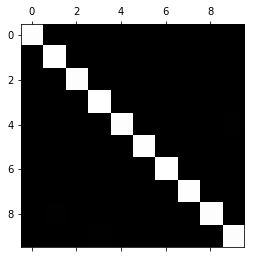


-- Test data --
Accuracy: 96.96%
Confusion Matrix:
[[ 961    0    1    3    1    3    5    3    1    2]
 [   0 1126    1    3    1    0    1    0    3    0]
 [   2    9  991   10    0    2    2   13    3    0]
 [   0    1    4  985    0   10    0    3    3    4]
 [   2    3    5    2  945    1    3    0    0   21]
 [   2    0    0   16    1  863    4    1    4    1]
 [   1    3    0    1    8    8  934    0    3    0]
 [   0    8    7    3    2    1    0  997    0   10]
 [   1    6    2    8    5    7    3    3  936    3]
 [   1    6    2   18   15    2    0    4    3  958]]


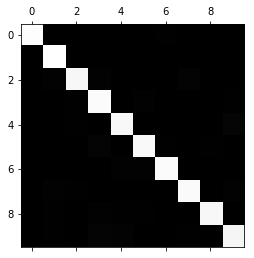

In [4]:
from sklearn.neural_network import MLPClassifier

# train model
model = MLPClassifier(random_state=seed)
evaluate(model)

<h2>XGBoost classifier</h2>

-- Training data --
Accuracy: 94.52%
Confusion Matrix:
[[5800    2    6    7   12    9   19    5   58    5]
 [   2 6618   29   28   11   12   11   10   13    8]
 [  35   26 5609   51   50    6   34   72   61   14]
 [  15   38   98 5636    8  108   15   56   93   64]
 [  12   16   19    2 5497    5   35   15   32  209]
 [  34   22   12  113   22 5020   79   10   52   57]
 [  24   12   14    2   32   79 5710    1   43    1]
 [  14   28   73   25   57    4    0 5917   12  135]
 [  25   61   48   80   30   56   31    7 5406  107]
 [  24   21   19   72  121   32    3  123   38 5496]]


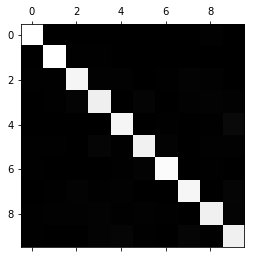


-- Test data --
Accuracy: 93.97%
Confusion Matrix:
[[ 966    0    1    0    0    1    5    1    5    1]
 [   0 1119    3    1    0    2    4    2    4    0]
 [  11    2  957   15   10    0    8   11   14    4]
 [   5    2   12  930    1   12    3   14   20   11]
 [   1    0    2    0  905    2    9    3   12   48]
 [   7    2    2   24    3  811   14    4   16    9]
 [   8    4    2    0    4   12  917    2    8    1]
 [   3    5   21    4    4    0    0  962    5   24]
 [   6    4    6   12    5    8   10    6  897   20]
 [   7    7    3   12   17    7    0    8   15  933]]


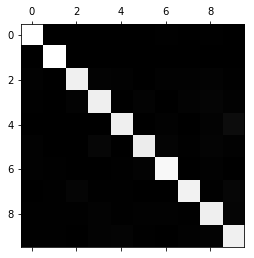

In [5]:
from xgboost import XGBClassifier

# Ignore deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# train model
model = XGBClassifier(random_state=seed)
evaluate(model)